In this notebook we plot the albedo function in the 0D EBM.

In [2]:
# Imports 

# Custom Code
from plotting import *
from EBM import *

# Standard packages
import numpy as np

## Setting Save Location

In [2]:
plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM/'
ensure_directory_exists(plot_save_dir)

## Plotting Albedo Ramp + R_I vs R_O

In [25]:
(TSI*0.8)/(0.6 * capacity)

0.0001735873015873016

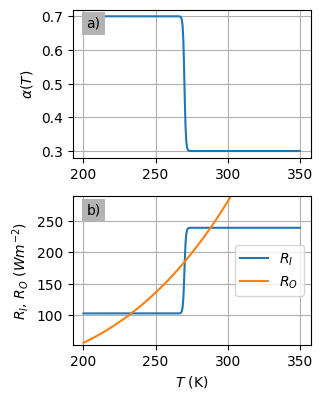

/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM//albedo-ramp-and-RI-vs-RO.pdf


In [5]:
Ts = np.linspace(200, 350, 300)

fig, axes = init_2d_fax(nrows=2)

ax = axes[0]
alphas = albedo(Ts)
ax.plot(Ts, alphas)
# ax.set_xlabel('T')
ax.set_ylabel('$\\alpha(T)$')

ax = axes[1]
RIs = R_I(Ts)
ROs = R_O(Ts)
ax.plot(Ts, RIs, label='$R_{I}$')
ax.plot(Ts, ROs, label='$R_{O}$')
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$R_{I}$, $R_{O}$ $(Wm^{-2})$')
ax.set_ylim(R_I(200) - 50, R_I(300) + 50)
ax.legend(loc=7)
fig.tight_layout()
plt.show()

plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM/'
save_name = plot_save_dir + '/albedo-ramp-and-RI-vs-RO.pdf'
fig.savefig(save_name)
plt.show()
print(save_name)

# Plotting Potential

In [27]:
from make_bifurcation_diagram import find_attractors

attractors = find_attractors(1367)
attractors

array([233.078, 288.068])

In [28]:
capacity

10500000

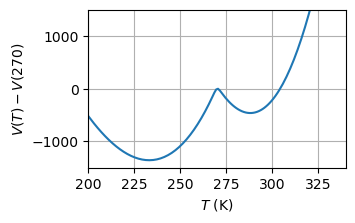

In [17]:
fig, ax = init_2d_fax()
Ts = np.linspace(200, 340, 140)

ax.plot(Ts, potential(Ts) - potential(270))
plt.xlim(200, 340)
plt.ylim(-1500, 1500)
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$V(T) - V(270)$')
Ts = np.linspace(200, 340, 30)


save_name = plot_save_dir + '/Potential-Well.pdf'
fig.savefig(save_name)
plt.show()
print(save_name)

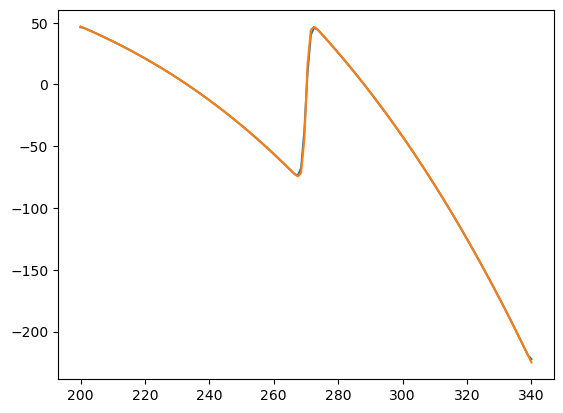

In [30]:
# Verifying potential is a potential
plt.plot(Ts, - np.gradient(potential(Ts), Ts))
plt.plot(Ts, ebm_rhs(Ts))